# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [16]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [18]:
%%R

require('tidyverse')


### Read data

In [19]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip popul…¹ borough pct_h…² pct_a…³ pct_a…⁴ pct_b…⁵ pct_w…⁶ pct_n…⁷ pct_s…⁸
   <dbl>   <dbl> <chr>     <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 11368  112088 QUEENS    76.5    11.6     0.09    7.12    3.73    0       0.37
 2 11385  107796 QUEENS    45.0     6.46    0.03    1.77   45.3     0       0.32
 3 11211  103123 BROOKL…   24.1     5.53    0.19    3.56   64.2     0.02    0.29
 4 11208  101313 BROOKL…   40.6     6.01    0.03   48.9     2.71    0       0.76
 5 10467  101255 BRONX     52.1     5.68    0.35   30.4     9.24    0.02    0.76
 6 11236  100844 BROOKL…    7.66    2.58 

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


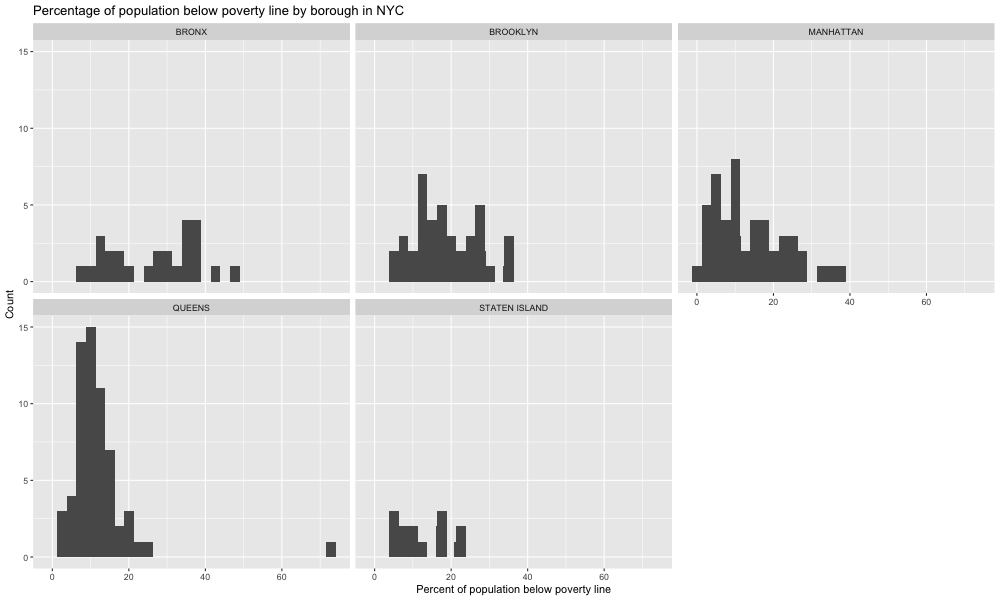

In [45]:
%%R -w 1000 -h 600

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() +
    facet_wrap(~borough) +
    stat_bin(bins=80) +
    labs(x = "Percent of population below poverty line",
        y = "Count",
        title = "Percentage of population below poverty line by borough in NYC")

I didn't add a subtitle because histogram in this case is confusing. I didn't know what subtitle to add without getting some analysis wrong. Like I can see that there seem to be more residents close to the 40% mark for Bronx and Brooklyn but I'm not sure if this is the best way.

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

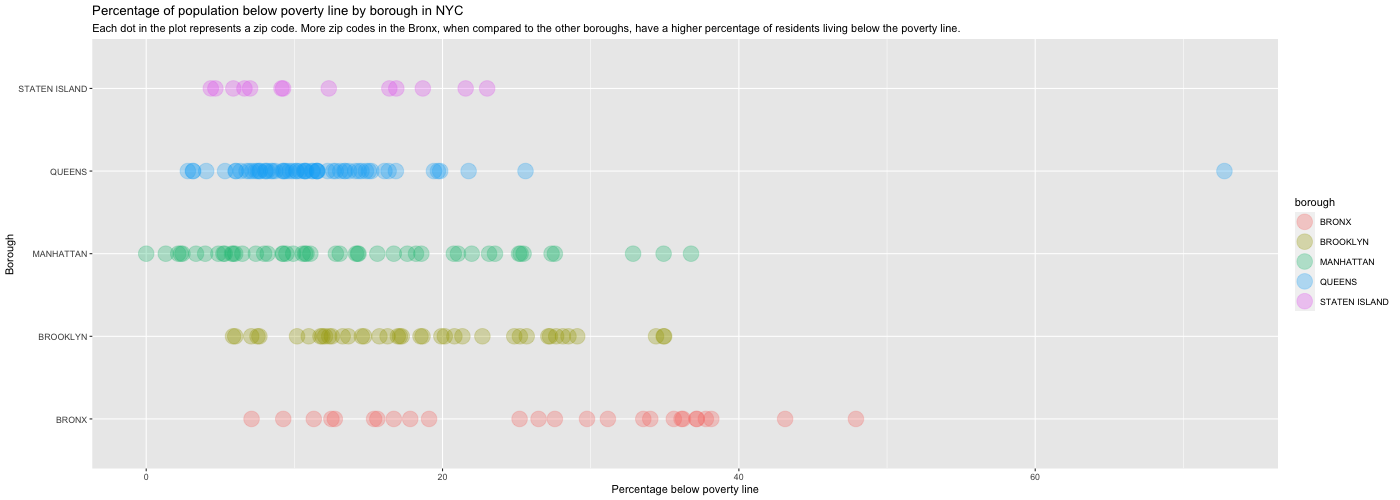

In [60]:
%%R -w 1400 -h 500

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, color = borough) +
    geom_point(alpha=.3, size=7) +
    labs(x = "Percentage below poverty line",
        y = "Borough",
        title = "Percentage of population below poverty line by borough in NYC",
        subtitle = "Each dot in the plot represents a zip code. More zip codes in the Bronx, when compared to the other boroughs, have a higher percentage of residents living below the poverty line.")

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

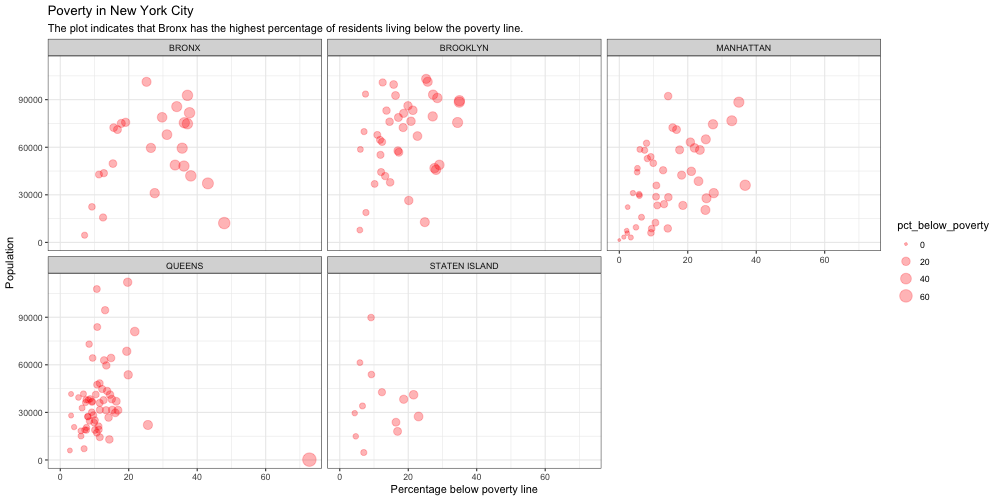

In [8]:
%%R -w 1000 -h 500


ggplot(df) + 
    aes(x=pct_below_poverty, y=population, size = pct_below_poverty) +
    geom_jitter(alpha = 0.3, color = 'red') +
    facet_wrap(~borough) +
    labs(x='Percentage below poverty line',
        y='Population',
        title = "Poverty in New York City",
        subtitle = "The plot indicates that Bronx has the highest percentage of residents living below the poverty line.") +
    theme_bw()

    

Question: What if the subtitle is long-ish and we want to split it into multiple lines?

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


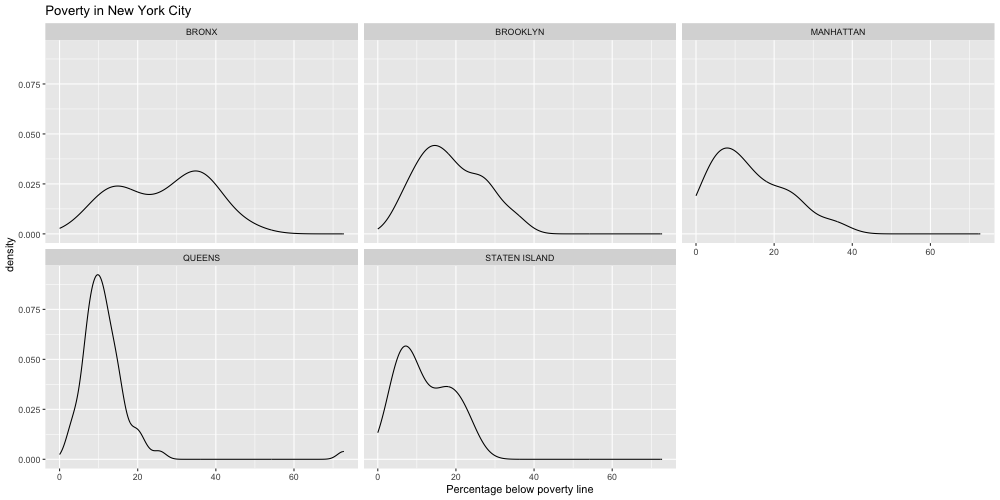

In [9]:
%%R -w 1000 -h 500
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density() +
    facet_wrap(~borough) +
    labs(x='Percentage below poverty line',
        title = "Poverty in New York City")

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


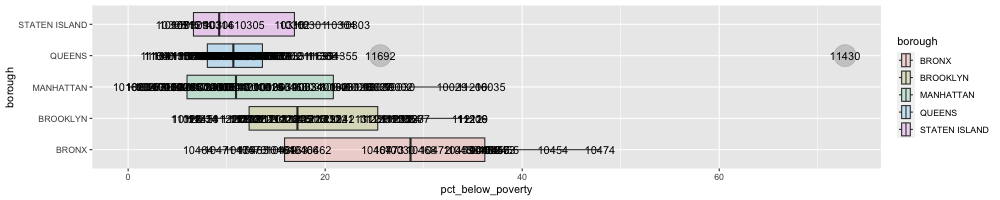

In [73]:
%%R -w 1000 -h 200

# Mark all the zip codes to check which are outliers

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, fill=borough, label=zip) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    geom_text()

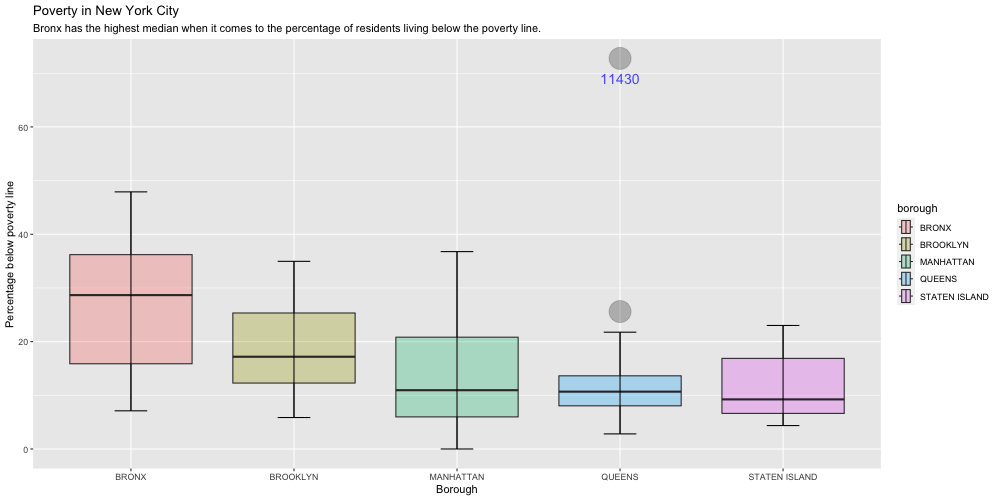

In [86]:
%%R -w 1000 -h 500

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough, fill=borough) +
    geom_boxplot(alpha=.3,outlier.size=10) +
    stat_boxplot(geom="errorbar", width=.2) +
    annotate("text", x=69, y=4, label="11430", color="blue", alpha=.7, size=5) +
    labs(x='Percentage below poverty line',
        y='Borough',
        title = "Poverty in New York City",
        subtitle = "Bronx has the highest median when it comes to the percentage of residents living below the poverty line.") +
    coord_flip()

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful



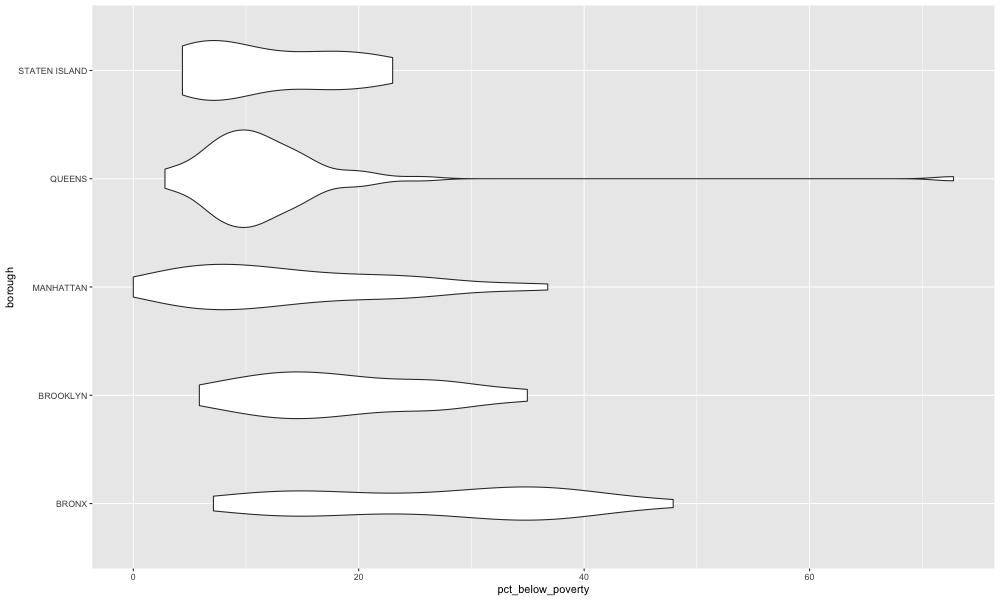

In [15]:
%%R -w 1000 -h 600

ggplot(df) + 
    aes(x=borough, y=pct_below_poverty) +
    geom_violin() +
    coord_flip()

Violin plot reflects the spread of the data better. It is easier to notice how skewed or normally distributed the data is.

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

In [88]:
%%R

library(ggbeeswarm)


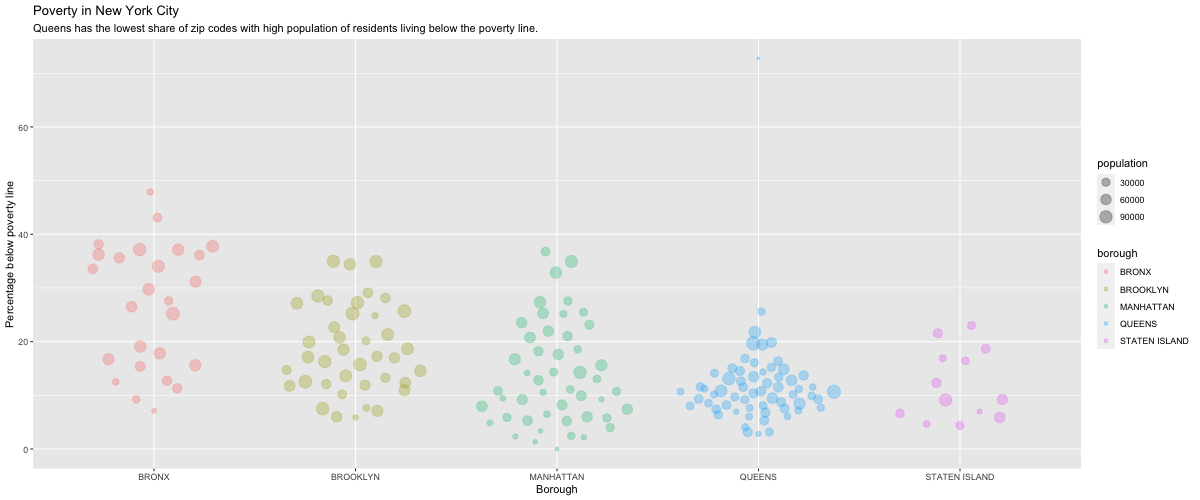

In [107]:
%%R -w 1200 -h 500

ggplot(df) + 
    aes(x=borough, y=pct_below_poverty, size =population, color=borough) +
    geom_quasirandom(alpha = 0.3) +
    labs(x='Borough',
        y='Percentage below poverty line',
        title = "Poverty in New York City",
        subtitle = "Queens has the lowest share of zip codes with high population of residents living below the poverty line.")